A Bayesian Network is a probabilistic graphical model that depicts a set of variables and their conditional dependencies using a directed acyclic graph (DAG). We’ll use Bayesian Networks to solve the Monty Hall Problem.

Monty Hall Problem:
This problem entails a competition in which a contestant must choose one of three doors, one of which conceals a price. The show’s host (Monty) unlocks an empty door and asks the contestant if he wants to swap to the other door after the contestant has chosen one. 

The decision is whether to keep the current door or replace it with a new one. It is preferable to enter by the other door because the price is more likely to be higher. To come out from this ambiguity let’s model this with a Bayesian network.

In [2]:
!pip install pgmpy
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt


In [4]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])

In [5]:
# Defining the propability tables CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])

In [6]:
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [7]:
# Now we will check the model structure and associated conditional probability distribution 
# by the argument check_model() 
# will return True if every this is fine else through an error msg.
model.check_model()

True

In [8]:
# Now let’s infer the network, 
# if we want to check at the next step which door will the host open now. 
# For that, we need access to the posterior probability from the network and 
# while accessing we need to pass the evidence to the function. 
# Evidence is needed to be given when we are evaluating posterior probability, 
# here in our task evidence is nothing but which door is Guest selected and where is the Price.

# Infering the posterior probability
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


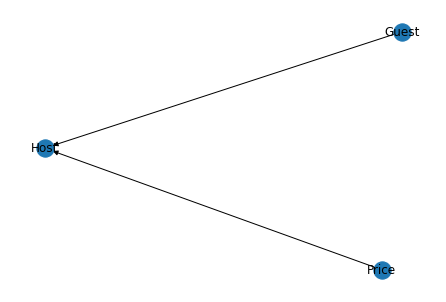

In [10]:
# plot the model
nx.draw(model, with_labels=True)
plt.show()
plt.close()
